<a href="https://colab.research.google.com/github/Jarnoesse/IA-AGN-with-ML/blob/main/Dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
 
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
 
import seaborn as sns

In [ ]:
table_RACS_catalogue_URL = 'http://oal.ul.pt/data/AlmaQA2/Catalogs_cV1ax509ZbXXx978pb3/RACS_VEXAS_ALLWISE_DES_PS1_SkyMapper_specZ_milliquas_v3.fits.gz'
table_RACS_cat = Table.read(table_RACS_catalogue_URL)

table_RACS_cat_df = table_RACS_cat.to_pandas() # convert to Pandas Dataframe

In [ ]:
attributes = ["MAG_AUTO_G_DES","MAG_AUTO_R_DES","MAG_AUTO_I_DES","MAG_AUTO_Z_DES","MAG_AUTO_Y_DES","z_spec_1","spec_class_1"]
DES_df = table_RACS_cat_df[attributes].copy()

attributes = ["GPETMAG_PS","RPETMAG_PS","IPETMAG_PS","ZPETMAG_PS","YPETMAG_PS","z_spec_2","class_2_2"]
PS_df = table_RACS_cat_df[attributes].copy()

attributes = ["U_PETRO_SM","V_PETRO_SM","G_PETRO_SM","R_PETRO_SM","I_PETRO_SM","Z_PETRO_SM","z_spec_3","spec_class_3"]
SM_df = table_RACS_cat_df[attributes].copy()

In [ ]:
DES_df  = DES_df[DES_df["spec_class_1"]>=0]

PS_df = PS_df[PS_df["class_2_2"]>=0]


SM_df = SM_df[SM_df["U_PETRO_SM"] >= 0]
SM_df = SM_df[SM_df["z_spec_3"] >= 0]


In [ ]:
DES_df.info(null_counts=True, verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12157 entries, 2 to 259245
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MAG_AUTO_G_DES  12157 non-null  float32
 1   MAG_AUTO_R_DES  12157 non-null  float32
 2   MAG_AUTO_I_DES  12157 non-null  float32
 3   MAG_AUTO_Z_DES  12157 non-null  float32
 4   MAG_AUTO_Y_DES  12157 non-null  float32
 5   z_spec_1        12157 non-null  float64
 6   spec_class_1    12157 non-null  Int16  
dtypes: Int16(1), float32(5), float64(1)
memory usage: 463.0 KB


In [ ]:
attributes = ["MAG_AUTO_G_DES","MAG_AUTO_R_DES","MAG_AUTO_I_DES","MAG_AUTO_Z_DES","MAG_AUTO_Y_DES"]

color_wheel = {0: "#0392cf", #blue Star
               1: "#7bc043", #green AGN
               2: "#ee4035"} #red Galaxy

colors = DES_df["spec_class_1"].map(lambda x: color_wheel.get(x))

###FACTOR ANALYSIS ALGORYTHM

In [ ]:
from sklearn.decomposition import FactorAnalysis

In [ ]:
transformer = FactorAnalysis(n_components = 7, random_state = 0)
transformed = transformer.fit_transform(DES_df[attributes].values)

In [ ]:
transformed.shape

(12157, 5)

In [ ]:
DES_df[attributes].values.shape

(12157, 5)

In [ ]:
attributes = ["x","y","","","",]
df = pd.DataFrame(columns=attributes,data=transformed)

In [ ]:
 attributes = ["x","y"]
 df = df[attributes]

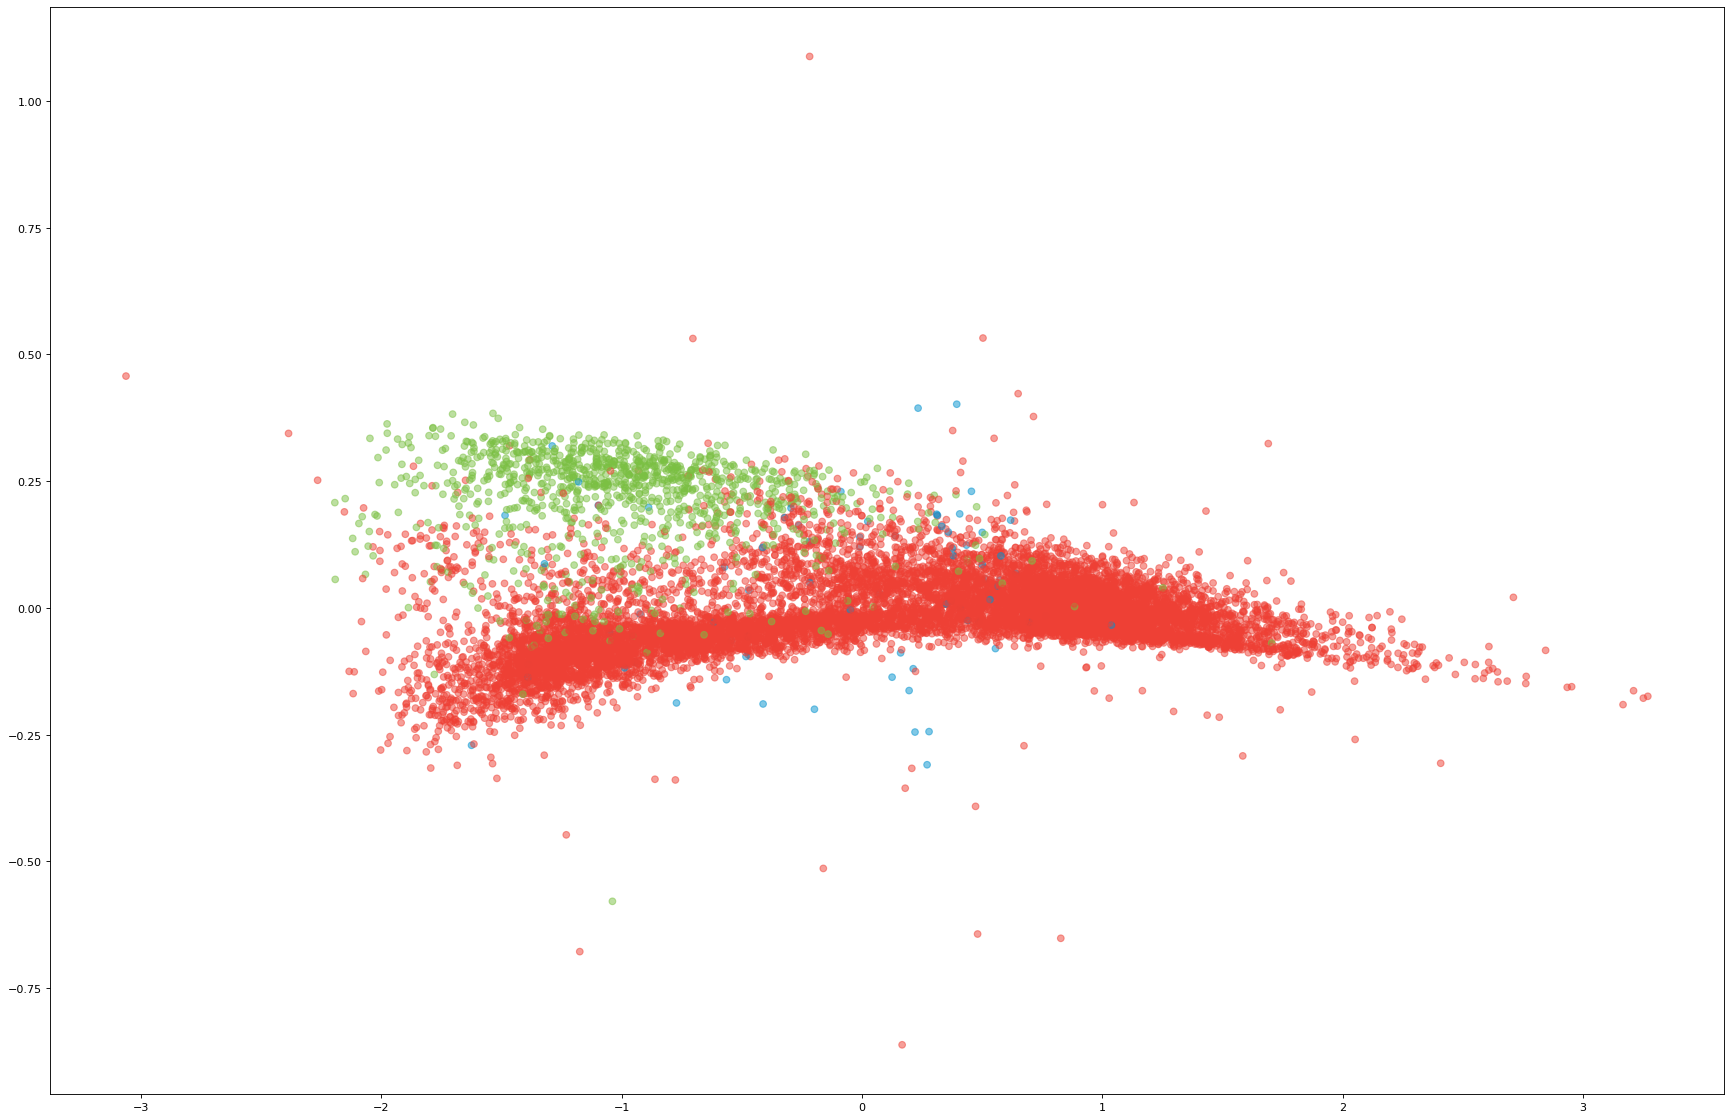

In [ ]:
plt.figure(figsize=(27, 18), dpi=80)
plt.scatter(df["x"],df["y"],c=colors,alpha = 0.5)


###KERNEL PCA

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
attributes = ["MAG_AUTO_G_DES","MAG_AUTO_R_DES","MAG_AUTO_I_DES","MAG_AUTO_Z_DES","MAG_AUTO_Y_DES"]
transformer = KernelPCA(n_components = 2, kernel='linear')
transformed = transformer.fit_transform(DES_df[attributes].values)


In [ ]:
attributes = ["x","y"]
df = pd.DataFrame(columns=attributes,data=transformed) 
attributes = ["x","y"]
df = df[attributes]

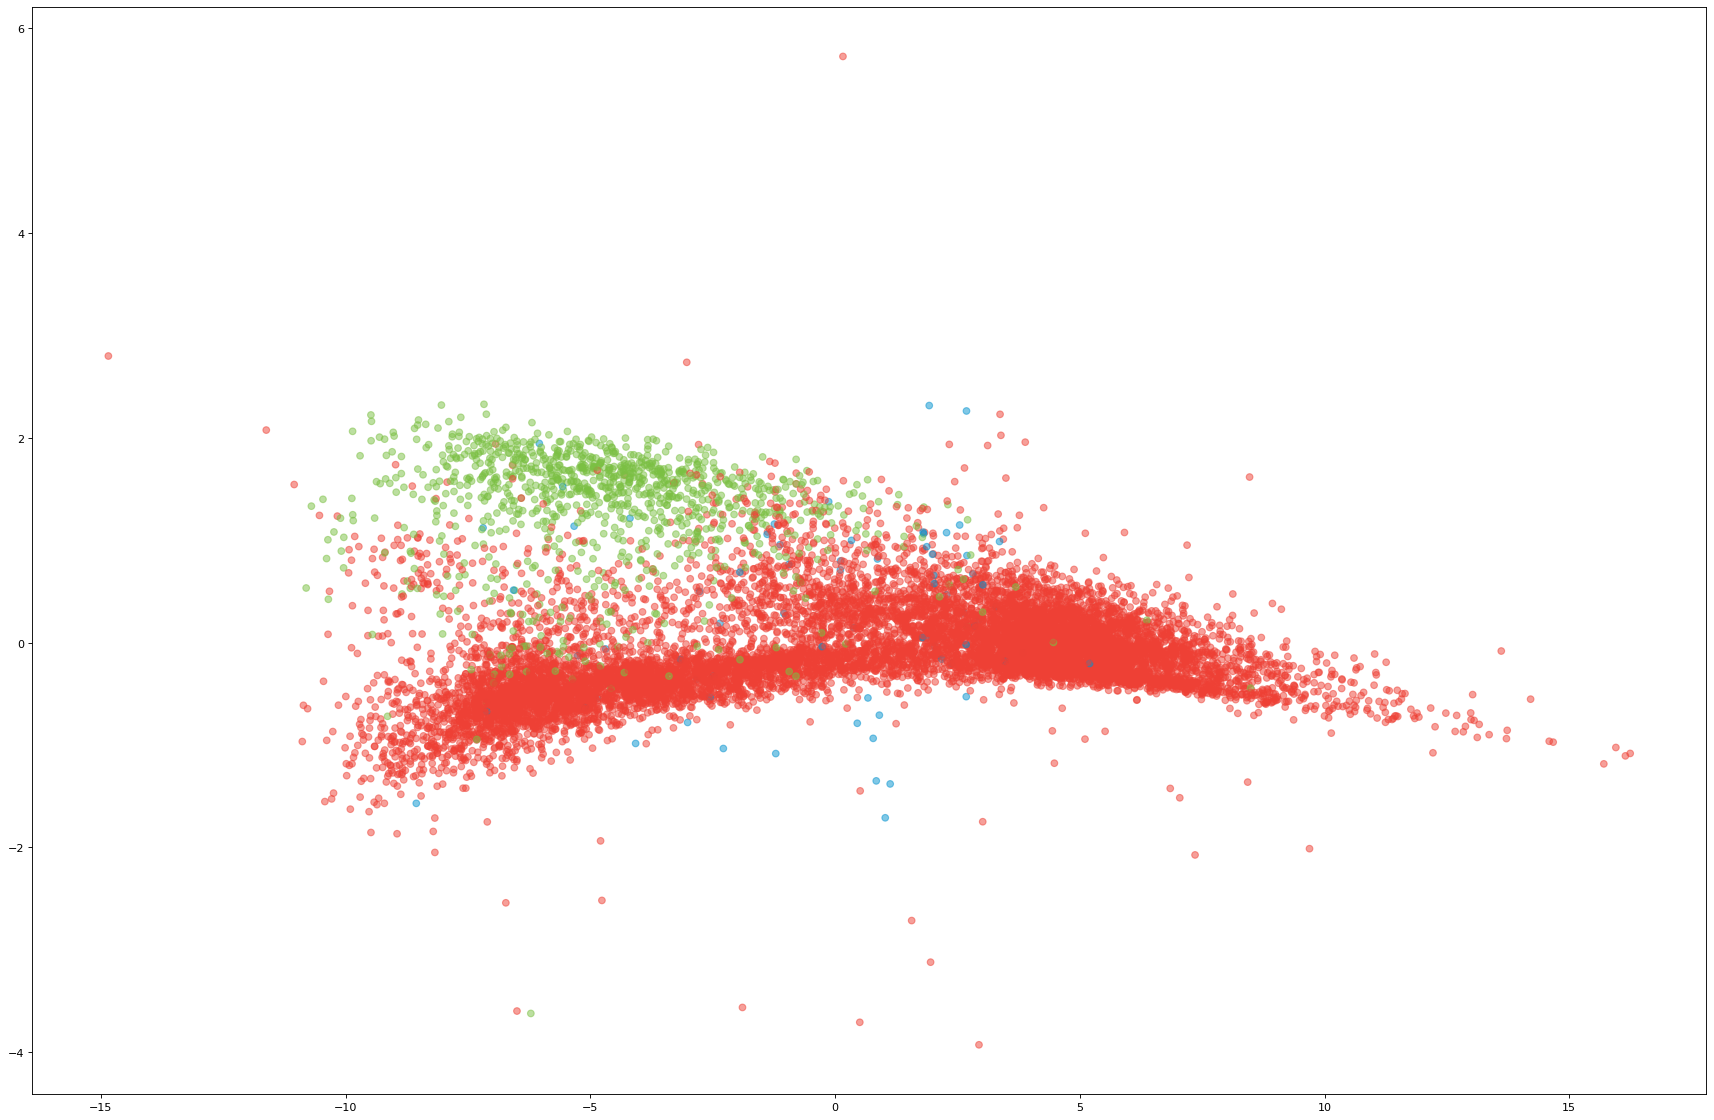

In [ ]:
plt.figure(figsize=(27, 18), dpi=80)
plt.scatter(df["x"],df["y"],c=colors,alpha = 0.5)


ISOMAP

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
attributes = ["MAG_AUTO_G_DES","MAG_AUTO_R_DES","MAG_AUTO_I_DES","MAG_AUTO_Z_DES","MAG_AUTO_Y_DES"]
transformer = Isomap(n_components = 2)
transformed = transformer.fit_transform(DES_df[attributes].values)


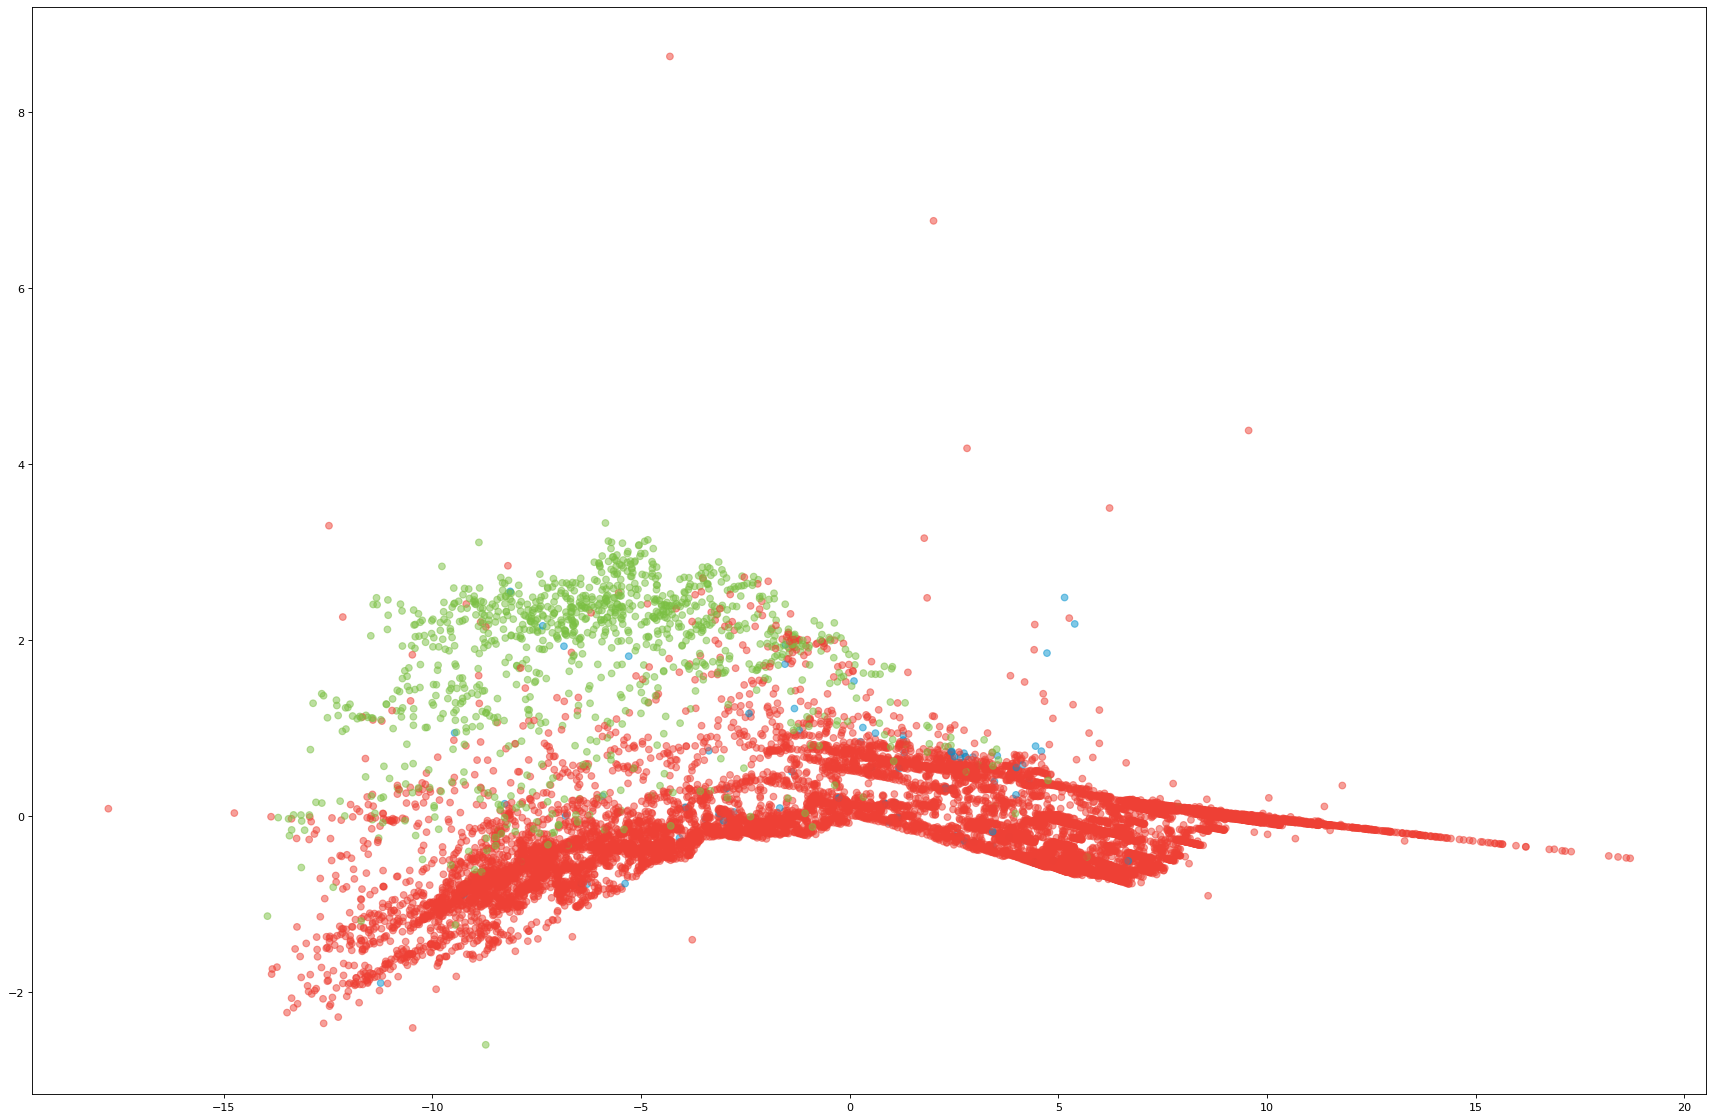

In [ ]:
attributes = ["x","y"]
df = pd.DataFrame(columns=attributes,data=transformed) 
attributes = ["x","y"]
df = df[attributes]
plt.figure(figsize=(27, 18), dpi=80)
plt.scatter(df["x"],df["y"],c=colors,alpha = 0.5)


LINEAR DISCRIMINANT

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)